In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [8]:
image = cv.imread("test_img.png")
dim = (448,336)
image = cv.resize(image, dim)

In [9]:
"""
cv.imshow("OpenCV Image Reading", image)

cv.waitKey(0)
"""

'\ncv.imshow("OpenCV Image Reading", image)\n\ncv.waitKey(0)\n'

In [26]:
k_size = (15,15) #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 3.0 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
wavelength = 3  #1/4 works best for angled. 
gamma=0.9 #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
psi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)


g_kernel1 = cv.getGaborKernel(k_size, sigma, theta, wavelength, gamma, psi, ktype=cv.CV_32F)
g_kernel2 = cv.getGaborKernel(k_size, sigma, 2*theta, wavelength, gamma, psi, ktype=cv.CV_32F)
g_kernel3 = cv.getGaborKernel(k_size, sigma, 3*theta, wavelength, gamma, psi, ktype=cv.CV_32F)
g_kernel4 = cv.getGaborKernel(k_size, sigma, 4*theta, wavelength, gamma, psi, ktype=cv.CV_32F)

filtered_img1 = cv.filter2D(image, cv.CV_8UC3, g_kernel1)
filtered_img2 = cv.filter2D(image, cv.CV_8UC3, g_kernel2)
filtered_img3 = cv.filter2D(image, cv.CV_8UC3, g_kernel3)
filtered_img4 = cv.filter2D(image, cv.CV_8UC3, g_kernel4)


filter_max1 = np.maximum(image, filtered_img1)
filter_max2 = np.maximum(filter_max1, filtered_img2)
filter_max3 = np.maximum(filter_max2, filtered_img3)
filter_max4 = np.maximum(filter_max3, filtered_img4)

In [14]:
cv.imshow("Theta pi/4", filtered_img1)
cv.imshow("Theta pi/2", filtered_img2)
cv.imshow("Theta 3pi/4", filtered_img3)
cv.imshow("Theta pi", filtered_img4)
cv.waitKey(0)

-1

<Figure size 432x288 with 0 Axes>

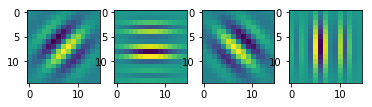

In [22]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(g_kernel1)
axarr[1].imshow(g_kernel2)
axarr[2].imshow(g_kernel3)
axarr[3].imshow(g_kernel4)




In [28]:
filters = cv.hconcat([filter_max1, filter_max2, filter_max3, filter_max4])
cv.imshow('filters', filters)

cv.waitKey(0)




-1

In [27]:

cv.imwrite("filter3-1.png", filter_max1)
cv.imwrite("filter3-2.png", filter_max2)
cv.imwrite("filter3-3.png", filter_max3)
cv.imwrite("filter3-4.png", filter_max4)

True

In [ ]:
"""
test1
k_size = (15,15) #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 3.0 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
wavelength = 3  #1/4 works best for angled. 
gamma=0.9 #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
psi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)

test2
k_size = (15,15) #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 3.5 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
wavelength = 1*np.pi/5  #1/4 works best for angled. 
gamma=0.9 #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
psi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)

test3
k_size = (15,15) #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 3.0 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
wavelength = 5  #1/4 works best for angled. 
gamma=0.9 #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
psi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)

"""